In [15]:
import pandas as pd

You should consider upgrading via the '/home/annabuchman/miniconda3/bin/python -m pip install --upgrade pip' command.


In [72]:
df_metadata=pd.DataFrame()
for i in range(0,100):
    str= f'metadata/ai/metadata_{i}.jsonl'
    md = pd.read_json(path_or_buf=str, lines=True)
    print(i, md.shape)
    df_metadata = df_metadata.append(md, ignore_index = True)

0 (974, 25)
1 (961, 25)
2 (936, 25)
3 (957, 25)
4 (951, 25)
5 (1013, 25)
6 (996, 25)
7 (985, 25)
8 (987, 25)
9 (0, 0)
10 (964, 25)
11 (986, 25)
12 (1035, 25)
13 (985, 25)
14 (1011, 25)
15 (1032, 25)
16 (1005, 25)
17 (1056, 25)
18 (924, 25)
19 (983, 25)
20 (928, 25)
21 (1019, 25)
22 (958, 25)
23 (1008, 25)
24 (984, 25)
25 (1006, 25)
26 (955, 25)
27 (938, 25)
28 (951, 25)
29 (977, 25)
30 (963, 25)
31 (998, 25)
32 (967, 25)
33 (950, 25)
34 (977, 25)
35 (904, 25)
36 (923, 25)
37 (990, 25)
38 (952, 25)
39 (913, 25)
40 (986, 25)
41 (952, 25)
42 (990, 25)
43 (977, 25)
44 (965, 25)
45 (994, 25)
46 (944, 25)
47 (929, 25)
48 (959, 25)
49 (935, 25)
50 (956, 25)
51 (957, 25)
52 (1000, 25)
53 (1024, 25)
54 (992, 25)
55 (974, 25)
56 (1019, 25)
57 (1013, 25)
58 (970, 25)
59 (963, 25)
60 (974, 25)
61 (948, 25)
62 (996, 25)
63 (967, 25)
64 (1005, 25)
65 (972, 25)
66 (994, 25)
67 (1004, 25)
68 (956, 25)
69 (961, 25)
70 (973, 25)
71 (987, 25)
72 (1025, 25)
73 (919, 25)
74 (981, 25)
75 (945, 25)
76 (964, 

Do sprawdzenia zbiory: 9 i od 85 do 92

In [35]:
df_metadata.shape

(88678, 25)

In [37]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88678 entries, 0 to 88677
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   paper_id                    88678 non-null  int64  
 1   title                       88678 non-null  object 
 2   authors                     88678 non-null  object 
 3   abstract                    76896 non-null  object 
 4   year                        86256 non-null  float64
 5   arxiv_id                    5943 non-null   object 
 6   acl_id                      1013 non-null   object 
 7   pmc_id                      3149 non-null   object 
 8   pubmed_id                   6877 non-null   float64
 9   doi                         63490 non-null  object 
 10  venue                       56813 non-null  object 
 11  journal                     60277 non-null  object 
 12  has_pdf_body_text           52461 non-null  float64
 13  mag_id                      845

In [38]:
df_metadata.isna().sum()

paper_id                          0
title                             0
authors                           0
abstract                      11782
year                           2422
arxiv_id                      82735
acl_id                        87665
pmc_id                        85529
pubmed_id                     81801
doi                           25188
venue                         31865
journal                       28401
has_pdf_body_text             36217
mag_id                         4136
mag_field_of_study             3509
outbound_citations                0
inbound_citations                 0
has_outbound_citations            0
has_inbound_citations             0
has_pdf_parse                     0
has_pdf_parsed_abstract       36217
has_pdf_parsed_body_text      36217
has_pdf_parsed_bib_entries    36217
has_pdf_parsed_ref_entries    36217
s2_url                            0
dtype: int64

In [58]:
dic_in=df_metadata.isna().sum()/df_metadata.shape[0]
dic_out = {x:y for x,y in dic_in.items() if y!=0}
dic_out

{'abstract': 0.13286271679559755,
 'year': 0.02731229842802048,
 'arxiv_id': 0.932982250389048,
 'acl_id': 0.9885766480976116,
 'pmc_id': 0.9644895013419338,
 'pubmed_id': 0.9224497620604885,
 'doi': 0.2840388822481337,
 'venue': 0.3593337693678252,
 'journal': 0.32027109316854235,
 'has_pdf_body_text': 0.40841020320710886,
 'mag_id': 0.04664065495387808,
 'mag_field_of_study': 0.039570130133742304,
 'has_pdf_parsed_abstract': 0.40841020320710886,
 'has_pdf_parsed_body_text': 0.40841020320710886,
 'has_pdf_parsed_bib_entries': 0.40841020320710886,
 'has_pdf_parsed_ref_entries': 0.40841020320710886}

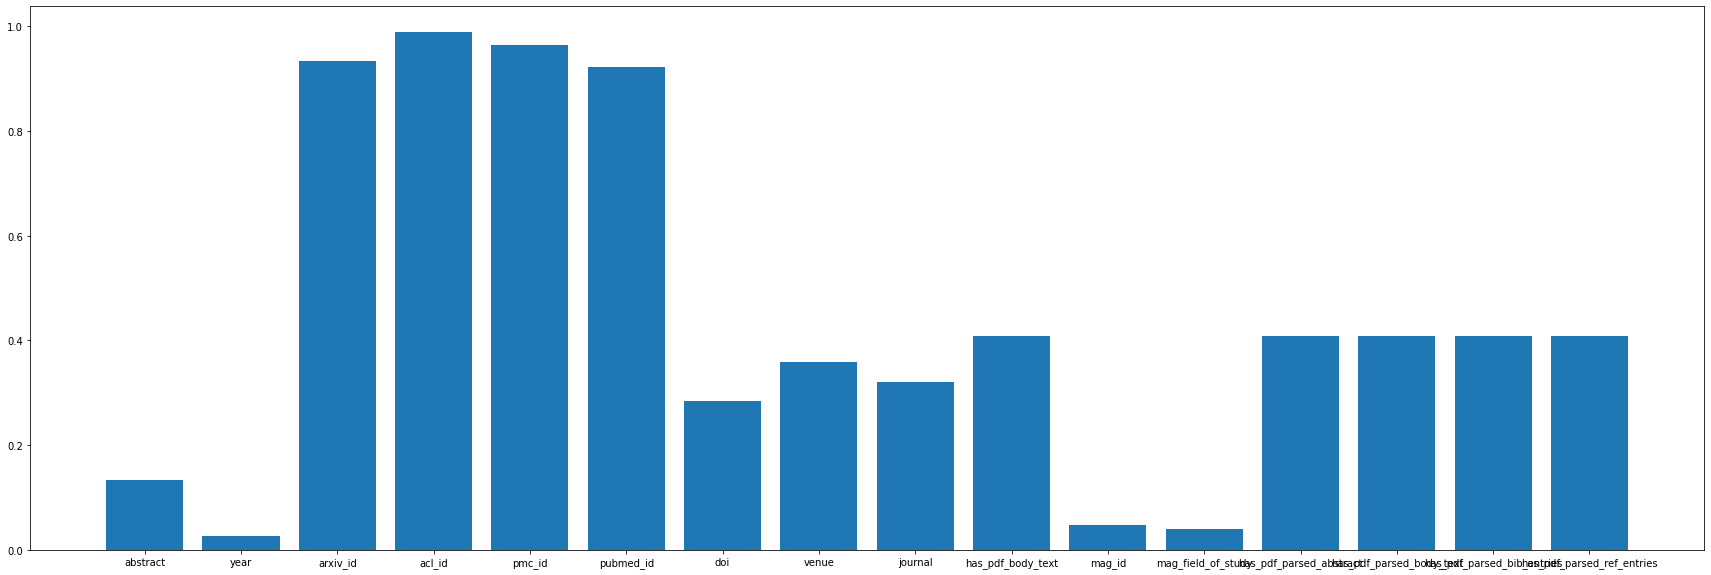

In [61]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(30, 10))

plt.bar(dic_out.keys(), dic_out.values())
plt.show()

In [64]:
df_metadata.has_outbound_citations.value_counts()

True     49828
False    38850
Name: has_outbound_citations, dtype: int64

In [65]:
df_metadata.has_inbound_citations.value_counts()

True     46590
False    42088
Name: has_inbound_citations, dtype: int64

In [66]:
df_metadata

,paper_id,title,authors,abstract,year,arxiv_id,acl_id,pmc_id,pubmed_id,doi,...,outbound_citations,inbound_citations,has_outbound_citations,has_inbound_citations,has_pdf_parse,has_pdf_parsed_abstract,has_pdf_parsed_body_text,has_pdf_parsed_bib_entries,has_pdf_parsed_ref_entries,s2_url
0,18984674,A fast structured regression for large networks,"[{'first': 'Fang', 'middle': [], 'last': 'Zhou...",Structured regression has been successfully us...,2016.0,NaN,None,None,NaN,10.1109/BigData.2016.7840594,...,"[118695096, 1480192, 1767868, 13045471, 102455...","[8018578, 202540676]",True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:18984674
1,199668943,3D Human Pose Estimation under limited supervi...,"[{'first': 'Rahul', 'middle': [], 'last': 'Mit...",Estimating 3D human pose from monocular images...,2019.0,1908.05293,None,None,NaN,None,...,"[206592419, 2087262, 84843959, 121923341, 8281...",[209854462],True,True,True,1.0,1.0,1.0,1.0,https://api.semanticscholar.org/CorpusID:19966...
2,199669259,Label Propagation Ensemble for Hyperspectral I...,"[{'first': 'Youqiang', 'middle': [], 'last': '...",The imbalance between limited labeled pixels a...,2019.0,NaN,None,None,NaN,10.1109/JSTARS.2019.2926123,...,"[54451996, 20512632, 46275095, 17894508, 54454...",[],True,False,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:19966...
3,17786002,FFPred 3: feature-based function prediction fo...,"[{'first': 'Domenico', 'middle': [], 'last': '...",Predicting protein function has been a major g...,2016.0,NaN,None,PMC4999993,27561554.0,10.1038/srep31865,...,"[5913602, 2682835, 26580409, 1298380, 13621547...","[3813773, 21709767, 3517624, 53712748, 2109381...",True,True,True,1.0,1.0,1.0,1.0,https://api.semanticscholar.org/CorpusID:17786002
4,124527934,Influence of SVR Parameter on Non-linear Funct...,"[{'first': 'Wang', 'middle': [], 'last': 'Xi-l...",The theoretical study and experimental demonst...,2011.0,NaN,None,None,NaN,None,...,[],"[45645372, 83461167, 27871023]",False,True,False,NaN,NaN,NaN,NaN,https://api.semanticscholar.org/CorpusID:12452...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88673,59337573,Spatiotemporal Representation Learning for Tra...,"[{'first': 'Tieyun', 'middle': [], 'last': 'Qi...",The increasing proliferation of location-based...,2019.0,NaN,None,None,NaN,10.1145/3295499,...,"[58792962, 9095914, 51609740, 8785978, 9091060...","[211068921, 164212183, 211526208, 210929990, 2...",True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:59337573
88674,13013603,Research on the Algorithm of Pedestrian Recogn...,"[{'first': 'Ying', 'middle': [], 'last': 'Yang...",After extracting the candidate region from an ...,2012.0,NaN,None,None,NaN,10.1109/DCABES.2012.108,...,"[38288198, 110116406]","[198334693, 14520202]",True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:13013603
88675,45846893,A coefficient comparison of weighted similarit...,"[{'first': 'Wasu', 'middle': [], 'last': 'Kudi...",Machine learning techniques are becoming popul...,2016.0,NaN,None,None,NaN,10.1109/KST.2016.7440525,...,"[117506064, 46373712, 10464157, 14425461, 2394...",[4884708],True,True,True,0.0,0.0,1.0,0.0,https://api.semanticscholar.org/CorpusID:45846893
88676,19939515,The appropriateness of predicate invention as ...,"[{'first': 'Irene', 'middle': [], 'last': 'Sta...",The task of predicate invention in Inductive L...,2004.0,NaN,None,None,NaN,10.1007/BF00993476,...,"[16136188, 2884276, 18510804, 12395063, 124389...",[],True,False,True,1.0,1.0,1.0,1.0,https://api.semanticscholar.org/CorpusID:19939515


In [69]:
df_metadata['year'].min()


1025.0

In [85]:
years=df_metadata['year'].value_counts()
#wykresik- ciąć do 2019, jak to zrobili -> jak tabstarkty rozkładają się w czasie

In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(30, 10))

plt.bar(years.keys(), years.values())
plt.show()

TypeError: 'numpy.ndarray' object is not callable

<Figure size 2160x720 with 0 Axes>

<AxesSubplot:title={'center':'Liczba artykułów w kolejnych latach'}>

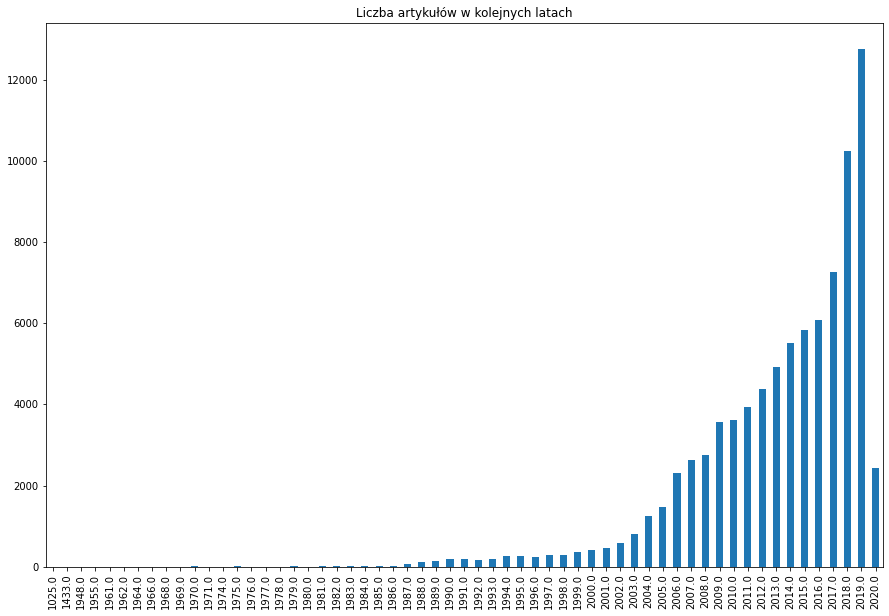

In [98]:
years.sort_index().plot(kind='bar', figsize=(15,10), title="Liczba artykułów w kolejnych latach")
